In [32]:
!pip install matplotlib
!pip install opencv-python
!pip install notebook
!pip install pyserial
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 11.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 MB 541.9 kB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 4.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 MB 1.0 MB/s eta 0:00:0000:0100:03
^C2K   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━ 33.6/46.3 MB 1.1 MB/s eta 0:00:12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━ 33.6/46.3 MB 1.1 MB/s eta 0:00:12
ERROR: Operation cancelled by user


Objetivos da aula:

- Conhecer o que é uma imagem digital
- Conhecer como fazer leitura e exibição de imagens
- conhecer algumas propriedades de imagens
- conhecer canais de cores de imagens

  
## *Representação e visualização de imagem*

Uma imagem digital nada mais é que uma uma matriz de linhas e colunas, onde cada posição desta matriz contem o valor de um pixel.

O valor de cada pixel representa a intensidade de cor naquele ponto especifico.

OpenCv (cv2) ---> principal biblioteca de processamento de imagem

Numpy ---> tudo dentro dessa biblioteca é um vetor


In [8]:
# Importando a biblioteca OpenCV
import cv2

#import a biblioteca Numpy8 bits
import numpy as np

#linha magica para imprimir graficos no notebook
%matplotlib inline
from matplotlib import pyplot as plt


print ("OpenCV Versão : %s " % cv2.__version__)

OpenCV Versão : 4.11.0 


In [37]:
# Para facilitar o download das imagens utilizadas neste notebook

!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab01/NATUREZA_1.jpg" /content # este link é o local onde a imagem está salva
!wget "https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab01/img3x3.png" /content


--2025-02-18 16:38:06--  https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab01/NATUREZA_1.jpg
185.199.109.133, 185.199.110.133, 185.199.111.133, ...ntent.com)... 
conectado.-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... 
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 233789 (228K) [image/jpeg]
Salvando em: “NATUREZA_1.jpg”

NATUREZA_1.jpg      100%[===================>] 228,31K   541KB/s    em 0,4s    

2025-02-18 16:38:07 (541 KB/s) - “NATUREZA_1.jpg” salvo [233789/233789]

Prepended http:// to '/content'
http:///content: O nome de máquina é inválido.
FINALIZADO --2025-02-18 16:38:07--
Tempo total decorrido: 1,4s
Baixados: 1 arquivos, 228K em 0,4s (541 KB/s)
--2025-02-18 16:38:07--  https://raw.githubusercontent.com/arnaldojr/cognitivecomputing/master/material/aulas/PDI/lab01/img3x3.png
185.199.110.133, 185.199.111.133, 185.199.108.133, ...ntent.com)... 
conectado.-se a raw.githubuserc

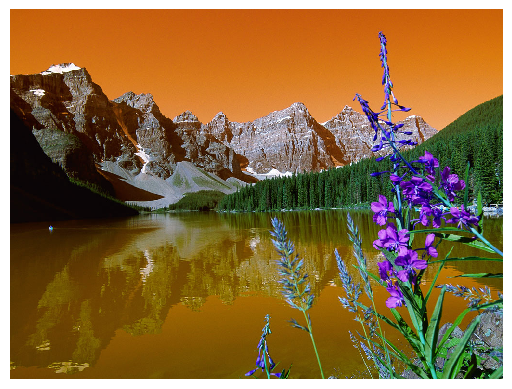

In [54]:
# Imagem carregada em bgr
# para nao imprimir os eixos
image = cv2.imread("Aula 1302/NATUREZA_1.jpg") #carregou a imagem em memória

plt.imshow(image,interpolation="none")
plt.axis('off')
plt.show()

A imagem colorida possui três dimensões: as linhas e as colunas da matriz, bem como os canais da imagem. **Uma imagem colorida geralmente possui três canais: R (Red - vermelho) G (Green - verde) B (Blue - azul)**

Mas porque a imagem é mostrada de modo estranho pelo pacote matplotlib? Porque a OpenCV representa os canais da imagem na ordem B - G - R, e não R - G - B como é esperado pela maior parte das bibliotecas.

**Assim, para podermos visualizar corretamente uma imagem do OpenCV com matplotlib, precisamos inverter os canais, como no código abaixo:**

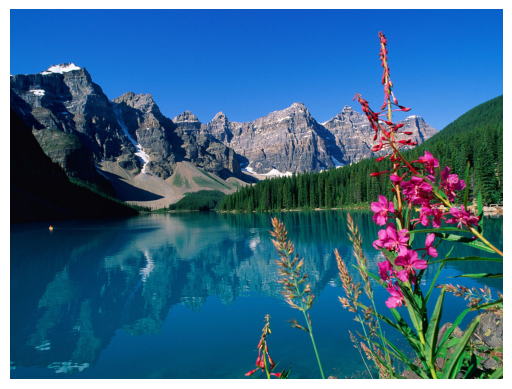

In [24]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #pega a matriz e o cvs.color converte de bgr para rgb (pq a biblioteca que carregamos não trabalha com o padrão rgb e sim bgr, aí ele faz essa conversão já que pra plotar ele plota com rbg)

plt.imshow(image_rgb)

plt.axis('off') #o plt.axis('off') mostra a imagem sem as réguas de medida pelas bordas
plt.show()


In [19]:
# Mostrando a representação interna da imagem
print("Dimensões da imagem: ", image_rgb.shape) #método shape --> atributos da imagem, devolve uma dupla com 3 argumentos. (dupla-item imutável); devolve: Dimensões da imagem:  (768, 1024, 3)
#|_ primeiro argumento = altura, 2° = largura, 3° = quantos canais de cores a imagem tem (neste caso 3 --> rgb)
print("Quantidade de linhas: ", image_rgb.shape[0])
print("Quantidade de colunas: ", image_rgb.shape[1])
print("Camadas de cores: ", image_rgb.shape[2])

Dimensões da imagem:  (768, 1024, 3)
Quantidade de linhas:  768
Quantidade de colunas:  1024
Camadas de cores:  3


In [21]:
# Mostrando a representação interna da imagem
print("Dimensões da imagem: \n", image_rgb) #cada linha representa um pixel da matriz

Dimensões da imagem: 
 [[[ 10  92 194]
  [ 12  94 196]
  [ 12  95 197]
  ...
  [  6  98 201]
  [  5  97 200]
  [  2  95 198]]

 [[ 11  93 195]
  [ 11  94 196]
  [ 11  94 196]
  ...
  [  6  98 201]
  [  6  98 201]
  [  4  97 200]]

 [[ 11  94 196]
  [ 11  94 196]
  [  9  95 196]
  ...
  [  5  97 200]
  [  7  99 202]
  [  7 100 203]]

 ...

 [[  0  69 111]
  [  1  70 112]
  [  1  70 112]
  ...
  [ 11  31   6]
  [ 17  41  17]
  [  6  34   9]]

 [[  0  67 109]
  [  0  69 111]
  [  2  71 113]
  ...
  [ 65 105  68]
  [ 86 135  90]
  [ 82 136  86]]

 [[  0  66 108]
  [  0  69 111]
  [  2  71 113]
  ...
  [ 53 109  62]
  [ 72 138  77]
  [ 74 145  77]]]
Dimensões da imagem: 
 [[[255   5   5]
  [255 255 255]
  [  1   1 255]]

 [[255 255 255]
  [  1 255   1]
  [255 255 255]]

 [[  2 255 255]
  [255 255  21]
  [255   1 255]]]


A matriz acima é a representação da imagem de **forma numérica**, é o valor de **cada pixel da imagem**. Com esta imagem fica complicado. Vamos tentar analisar separando os canais de cores de um pixel específico.

In [22]:
(b, g, r) = image[450, 50]
print('O pixel (50, 50) tem as seguintes cores:')
print('Vermelho:',r, 'Verde:', g, 'Azul:', b)

O pixel (50, 50) tem as seguintes cores:
Vermelho: 2 Verde: 14 Azul: 36


══════ •『 ♡ 』• ══════ ══════ •『 ♡ 』• ══════

## Desafio 1

Abra a imagem "img3x3.png" e plote suas componentes externas (shape) e internas (matriz).

Como você esta relacionado as possições da matriz com os pixels da imagem??

IMAGEM CRUA


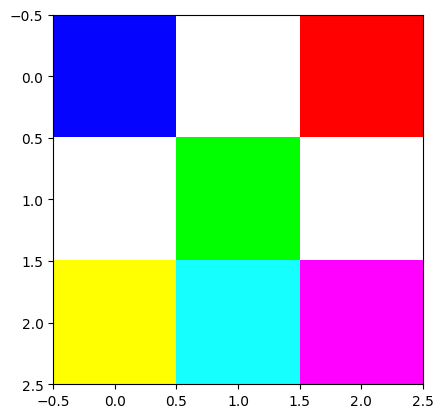

IMAGEM RGB


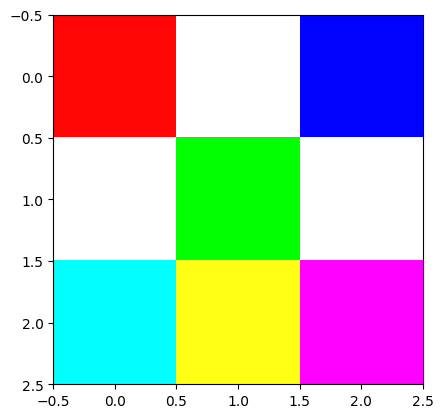

Tamanhos da imagem:  (3, 3, 3)
Altura:  3
Largura:  3
Camadas de cores:  3
Dimensões da imagem: 
 [[[255   5   5]
  [255 255 255]
  [  1   1 255]]

 [[255 255 255]
  [  1 255   1]
  [255 255 255]]

 [[  2 255 255]
  [255 255  21]
  [255   1 255]]]


In [52]:
#Imagem crua
print("IMAGEM CRUA")
image2 = cv2.imread("Aula 1302/img3x3.png")
plt.imshow(image2)
plt.show()

#Imagem RGB
print("IMAGEM RGB")
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
plt.imshow(image2_rgb)
# plt.axis('off')
plt.show()

#Dimenssões
print("Tamanhos da imagem: ", image2_rgb.shape)
print("Altura: ", image2_rgb.shape[0])
print("Largura: ", image2_rgb.shape[1])
print("Camadas de cores: ", image2_rgb.shape[2])
print("Dimensões da imagem: \n", image2_rgb)

══════ •『 ♡ 』• ══════ ══════ •『 ♡ 』• ══════

In [41]:
# import os
# print(os.path.exists("Aula 1302/img3x3.png"))

True


## Imagem em tons de cinza

Em muitos casos trabalhamos com imagens na escala de cinza, logo, a imagem possui apenas 1 canal de cor.

Temos com isso vantagem pq a imagem fica mais leve

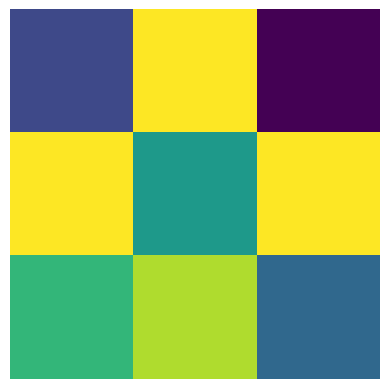

array([[ 79, 255,  29],
       [255, 150, 255],
       [179, 228, 105]], dtype=uint8)

In [47]:
import cv2
import numpy as np

from matplotlib import pyplot as plt


# Carregando a imagem na versão tons de cinza (grayscale) de um arquivo
imagem_cinza = cv2.imread("Aula 1302/img3x3.png", cv2.IMREAD_GRAYSCALE)

# ou use o argumento 0, tem o mesmo efeito de importar na escala de cinza
#imagem_cinza = cv2.imread("img3x3.png", 0)

plt.imshow(imagem_cinza)

plt.axis('off') 
plt.show()
imagem_cinza


visualmente a imagem não sai cinza de cara, esse é o default da biblioteca (default é o cmap --> viridis)
para de fato trabalhar na escala de cinza é feito a correção ---> cmap="gray"

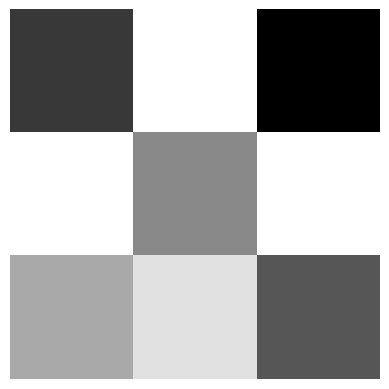

[[ 79 255  29]
 [255 150 255]
 [179 228 105]]


In [48]:
plt.imshow(imagem_cinza, cmap="gray")

plt.axis('off')
plt.show()
print(imagem_cinza)

══════ •『 ♡ 』• ══════ ══════ •『 ♡ 』• ══════

## Desafio 2

Eita! alguma está errada nesse plot, era esperado uma imagem na escala de cinza. Por que apareceu isso, como corrigir?

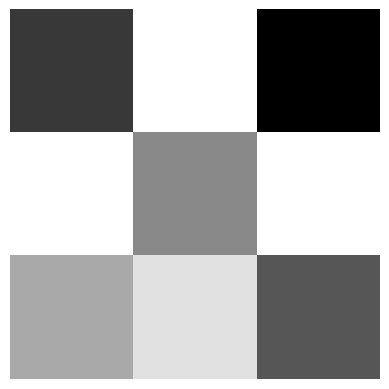

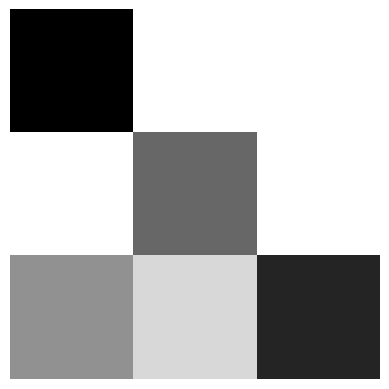

In [62]:
import cv2
import numpy as np

from matplotlib import pyplot as plt


# Carregando a imagem na versão tons de cinza (grayscale) de um arquivo
imagem_cinza = cv2.imread("Aula 1302/img3x3.png", 0)

plt.imshow(imagem_cinza, cmap='gray')

plt.axis('off')
plt.show()
imagem_cinza


imagem_cinza[0,2] = 255
plt.imshow(imagem_cinza, cmap='gray')
plt.axis('off')
plt.show()

## Amostragem da imagem

As imagens capturadas por dispositivos digitais possuem as características de resolução espacial e resolução de cores
Enquanto a resolução de cores afeta o número de cores que podem serr epresentadas na imagem, sua resolução espacial afeta o tamanho que a imagem irá ter. Embora não se possa comparar diretamente a resolução de duas imagens com tamanhos diferentes, a imagem do mesmo objeto, se possui mais pixels, significará que tamém possui maior resolução

### Alterando o tamanho de uma imagem

O redimensionamento da imagem pode ser feito na OpenCV através do comando `cv2.resize(imagem, tamanho, interpolação)`

O tamanho é dado por uma tupla (W,H), onde W é a largura (número de colunas) e H é a altura (número de linhas)